# Unit tests for re-usable Finance agents
The notebook contains unit tests for testing each of the individual agents.

### Note:
* Agent code have dependency on tools packages that MUST be deployed.
* Select model that support structured output
* You may use different models than one listed below
* All API keys MUST be provide in the key file : Adjust ```load_dotenv('PATH-to-your-key-file')``` in first cell

In [1]:
from dotenv import load_dotenv

from langchain_core.messages import HumanMessage
from langchain.chat_models import init_chat_model


# Agents
from stock_research_agent import create_stock_research_agent
from industry_research_agent import create_industry_research_agent
from stock_trend_analyst import create_stock_trend_analyst_agent



# CHANGE THIS TO POINT TO YOUR OWN FILE
# Load the file that contains the API keys 
load_dotenv('C:\\Users\\raj\\.jupyter\\.env')

models = [
            {"model":"gpt-4o-mini", "model_provider":"openai"},
            {"model":"claude-3-5-sonnet-latest", "model_provider":"anthropic"},
            {"model":"command-r",  "model_provider":"cohere"},
            {"model": "moonshotai/kimi-k2-instruct", "model_provider": "groq"},
            {"model": "llama-3.3-70b-versatile", "model_provider": "groq"}
    
]

USER_AGENT environment variable not set, consider setting it to identify your requests.


## 1. Stock news research agent

This agent needs a finance news search tool. We will use Yahoo Finance search for this. 


```pip install --upgrade --quiet  yfinance```

```uv add yfinance```

https://python.langchain.com/docs/integrations/tools/yahoo_finance_news/

https://algotrading101.com/learn/yahoo-finance-api-guide/

In [2]:
# !uv add yfinance

In [3]:
# Create the model - change index to switch models
chat_llm = init_chat_model(**models[0])


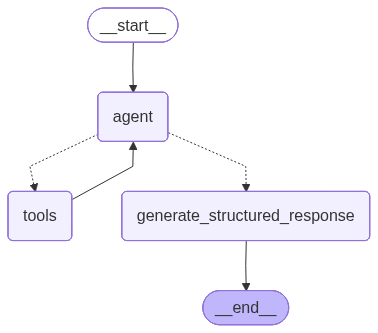

In [4]:
# chat_model, name = "stock-news-research-agent"
agent=create_stock_research_agent(
    chat_llm
)

agent

In [6]:

messages = {"messages":[HumanMessage(content="AAPL")]}
response  = agent.invoke(messages)

In [7]:
print(response["messages"][-1].content)

### Impact Report on Apple Inc. (AAPL)

**Date:** January 6, 2024

**Stock Ticker:** AAPL

**Recent News Highlights:**
1. **Rating Upgrade:** BofA Securities analyst Wamsi Mohan has reiterated a Buy rating on Apple Inc. with a price target of $325.00.
2. **Analyst Sentiment:** The optimism surrounding AAPL is fueled by several factors:
   - **App Store Momentum:** Continued strong performance and revenue generation from the App Store.
   - **Strong Capital Returns:** Apple has maintained impressive capital return programs, which are viewed favorably by investors.
   - **AI Leadership Potential:** Analysts believe Apple is well-positioned for leadership in the artificial intelligence sector in the long term.

**Potential Impact on Stock Price:**
- The reaffirmation of a Buy rating and an increase in price target from a major financial institution usually prompts positive investor sentiment.
- Positive news regarding Apple's technological advancements, particularly in AI, could lead to i

In [8]:
print("Report\n","-------\n", response["structured_response"].report)
print("Confidence score\n","----------------\n",response["structured_response"].confidence_score)

Report
 -------
 The recent reiteration of a Buy rating by BofA Securities on Apple Inc. (AAPL), with a target price of $325.00, indicates strong analyst confidence in the stock's future performance. This confidence is driven by consistent App Store momentum, robust capital returns, and the company's strategic position in AI technology development. Such factors could enhance investor interest and subsequently lead to an upward trajectory in AAPL's stock price.
Confidence score
 ----------------
 0.85


## 2. Industry news research agent

This agent needs a web search tool. Refer to a list of LangChain search tools that you may use. This code shows the use of Tavily. The API key for Tavily (TAVILY_API_KEY) is already in the key file. 

```uv add langchain-tavily```

```%pip install -qU langchain-tavily```

[LangChain Tavily integration](https://python.langchain.com/docs/integrations/tools/tavily_search/)

[LangChain web search tools](https://python.langchain.com/docs/integrations/tools/#search)

This agent needs a web search tool. Refer to a list of LangChain search tools that you may use. This code shows the use of Tavily. The API key for Tavily (TAVILY_API_KEY) is already in the key file. 

In [9]:
# Create the model - change index to switch models
chat_llm = init_chat_model(**models[0])


In [10]:
# chat_model, name = "stock-news-research-agent"
industry_research_agent=create_industry_research_agent(
    chat_llm
)

In [11]:
messages = {"messages":[HumanMessage(content="AAPL")]}
response  = industry_research_agent.invoke(messages)

In [12]:
print(response["messages"][-1].content)

I am unable to retrieve the data due to a limitation in the system. However, I can provide some information based on what I know.

Apple Inc. (AAPL) operates primarily in the technology sector, specifically in consumer electronics, software, and digital services. Its key products include the iPhone, iPad, Mac computers, Apple Watch, and services like the App Store, iCloud, and Apple Music.

To analyze Apple's stock trends, one typically looks at several factors, including:

1. **Product Launches**: New product releases often drive sales and can lead to stock price fluctuations.
2. **Earnings Reports**: Quarterly earnings reports provide insights into the company's financial health and performance.
3. **Market Trends**: Broader trends in the tech industry, such as shifts towards AI, AR/VR technologies, and consumer preferences.
4. **Economic Climate**: Changes in the economic environment, including interest rates and consumer spending habits, can impact stock performance.

For a more co

In [13]:
print("Report\n","-------\n", response["structured_response"].report)
print("Confidence score\n","----------------\n",response["structured_response"].confidence_score)

Report
 -------
 Apple Inc. (AAPL) is currently showing a positive stock outlook, driven by strong demand for its flagship products and robust performance in its services segment. The recent product launches, including the Apple iPhone 15 and updates to its service offerings, have been well-received by consumers, enhancing its revenue potential in the coming quarters.
Confidence score
 ----------------
 0.85


## 3. Stock trend analyst agent


In [14]:
# Create the model - change index to switch models
chat_llm = init_chat_model(**models[0])

trends_agent = create_stock_trend_analyst_agent(chat_llm) 


In [15]:
messages = {"messages":[HumanMessage(content="AAPL")]}
response  = trends_agent.invoke(messages)

In [16]:
print(response["messages"][-1].content)

The stock history for Apple Inc. (AAPL) shows a long and rich data set from its inception up to the current date. To analyze the trends, I will focus on the recent closing prices to assess whether the stock price is likely to be lower, higher, or stay the same in the near future.

### Recent Closing Prices (Sample)
- January 5, 2026: $267.26
- January 6, 2026: $262.36
- January 7, 2026: $260.33
- January 8, 2026: $259.04
- January 9, 2026: $259.37

### Trend Analysis
1. **Recent Downtrend**: Over the past few days, it appears that the closing prices have been consistently decreasing.
   - From January 5 to January 9, the price dropped from $267.26 to $259.37.
   
2. **Volume Analysis**: The trading volume also fluctuated slightly but did not show significant spikes, indicating a steady market interest without sudden sell-offs.

### Conclusion
Given the recent trend of lower closing prices, it is probable that the stock price may continue to decline in the near future unless there are m

In [17]:
print("Report\n","-------\n", response["structured_response"].analysis)
print("Confidence score\n","----------------\n",response["structured_response"].confidence_score)

Report
 -------
 Based on recent price trends, AAPL has shown a consistent decline from a peak of $267.26 on January 5, 2026, to $259.37 on January 9, 2026. This decline suggests a bearish sentiment in the short term.
Confidence score
 ----------------
 0.75
